In [1]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
%pip install statsmodels
from statsmodels.distributions.empirical_distribution import ECDF

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


# EDA

In [2]:
values = genfromtxt("sliceOfValues.csv")
pointers = genfromtxt("sliceOfPointers.csv")

## Distribution

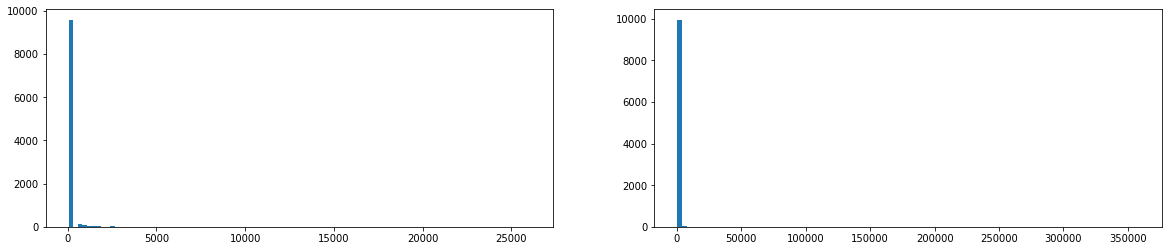

In [3]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 4))
ax1.hist(values, bins=int(np.sqrt(len(values))))
ax2.hist(pointers, bins=int(np.sqrt(len(pointers))))
plt.show()

## Call Duration in Order

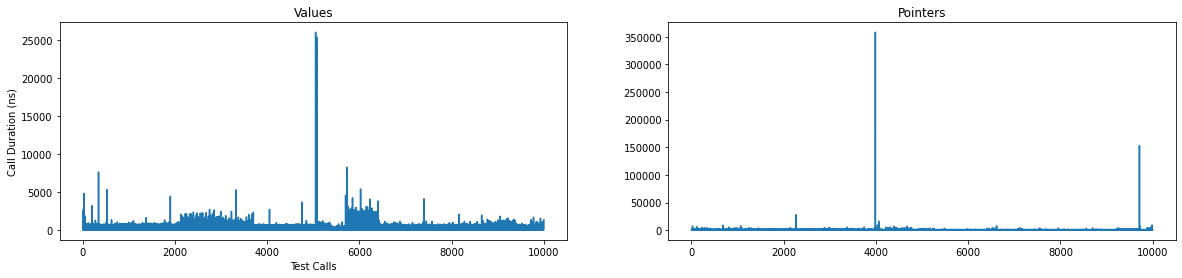

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 4), sharex=True)
ax1.plot(values)
ax1.set_title("Values")
ax1.set_ylabel("Call Duration (ns)")
ax1.set_xlabel("Test Calls")
ax2.plot(pointers)
ax2.set_title("Pointers")
ax1.set_ylabel("Call Duration (ns)")
ax1.set_xlabel("Test Calls")
plt.show()

## Summary Stats

In [6]:
print("values")
print("min", np.min(values))
print("meadian", np.median(values))
print("mean", np.mean(values))
print("std", np.std(values))
print("max", np.max(values))

values
min 51.0
meadian 60.0
mean 116.5074
std 474.26779180673867
max 26031.0


In [7]:
print("pointers")
print("min", np.min(pointers))
print("meadian", np.median(pointers))
print("mean", np.mean(pointers))
print("std", np.std(pointers))
print("max", np.max(pointers))

pointers
min 390.0
meadian 416.0
mean 606.2981
std 3935.395391525023
max 358250.0


In [9]:
ecdf_values = ECDF(values)
ecdf_pointers = ECDF(pointers)

## Ratio of Data Points

In [13]:
percentile = 20
print("+++ pointer +++")
print("percentile:",percentile, "=", np.percentile(ecdf_pointers.x, percentile))
print("data points greater", np.sum(ecdf_pointers.x >= np.percentile(ecdf_pointers.x, percentile)))
print("data points smaller", np.sum(ecdf_pointers.x < np.percentile(ecdf_pointers.x, percentile)))

print("\n+++ value +++")
print("percentile:",percentile, "=", np.percentile(ecdf_values.x, percentile))
print("data points greater", np.sum(ecdf_values.x >= np.percentile(ecdf_values.x, percentile)))
print("data points smaller", np.sum(ecdf_values.x < np.percentile(ecdf_values.x, percentile)))

+++ pointer +++
percentile: 20 = 402.0
data points greater 8225
data points smaller 1776

+++ value +++
percentile: 20 = 57.0
data points greater 8007
data points smaller 1994


## Compare ECDFs

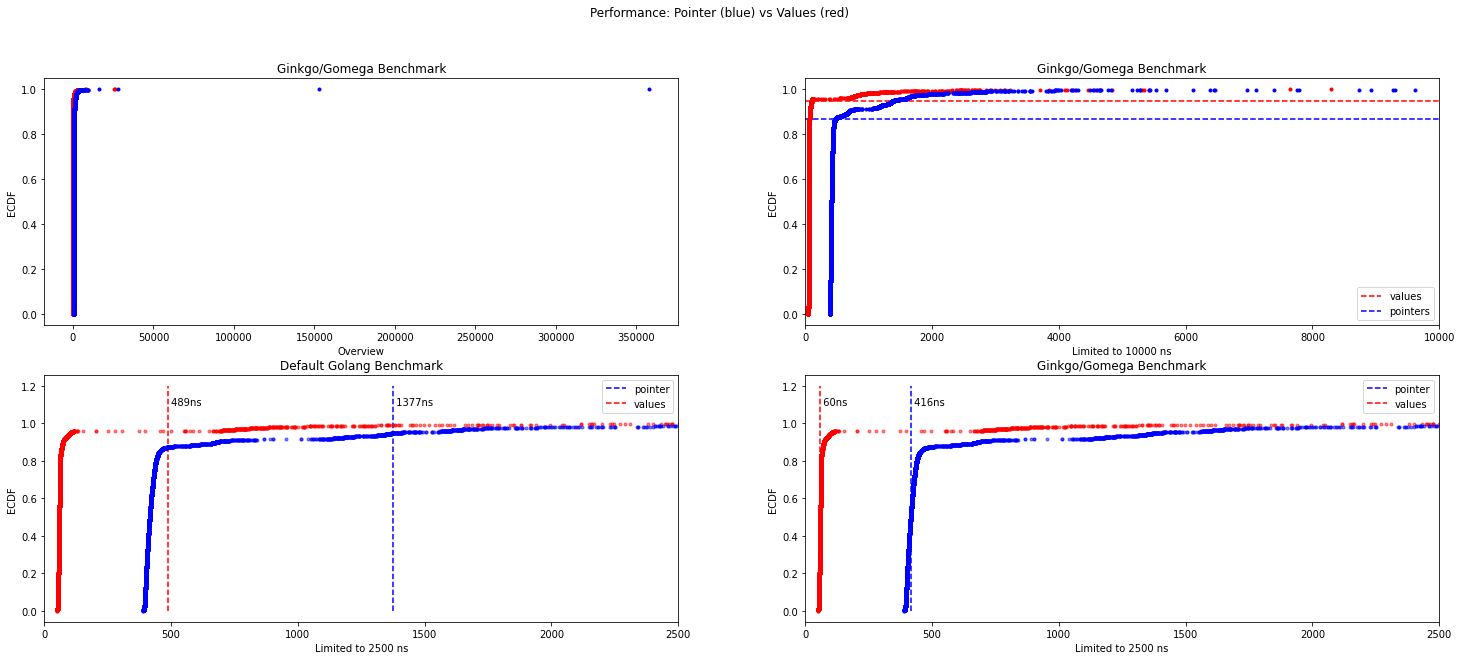

In [58]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(25, 10))
fig.suptitle('Performance: Pointer (blue) vs Values (red)')
ax1.plot(ecdf_values.x, ecdf_values.y, marker='.', linestyle='None', color='r')
ax1.plot(ecdf_pointers.x, ecdf_pointers.y, marker='.', linestyle='None', color='b')
ax1.set_xlabel('Overview')
ax1.set_ylabel('ECDF')
ax1.set_title('Ginkgo/Gomega Benchmark')

ax2.set_xlim(0, 10000)
ax2.plot(ecdf_values.x, ecdf_values.y, marker='.', linestyle='None', color='r')
ax2.plot(ecdf_pointers.x, ecdf_pointers.y, marker='.', linestyle='None', color='b')
ax2.set_xlabel('Limited to 10000 ns')
ax2.set_ylabel('ECDF')
ax2.set_title('Ginkgo/Gomega Benchmark')
ax2.hlines(y=0.95, xmin=0, xmax=10000, label='values', colors='r', linestyles='--')
ax2.hlines(y=0.87, xmin=0, xmax=10000, label='pointers', colors='b', linestyles='--')
ax2.legend()

ax3.set_xlim(0, 2500)
ax3.plot(ecdf_values.x, ecdf_values.y, marker='.', linestyle='None', color='r', alpha=0.5)
ax3.plot(ecdf_pointers.x, ecdf_pointers.y, marker='.', linestyle='None', color='b', alpha=0.5)
ax3.set_xlabel('Limited to 2500 ns')
ax3.set_title('Default Golang Benchmark')
ax3.set_ylabel('ECDF')
ax3.vlines(x=1377, ymin=0, ymax=1.2, colors='b', label='pointer', linestyles='--')
ax3.vlines(x=489, ymin=0, ymax=1.2, colors='r', label='values', linestyles='--')
ax3.legend()
ax3.text(1377, 1.1, ' 1377ns')
ax3.text(489, 1.1, ' 489ns')

ax4.set_xlim(0, 2500)
ax4.plot(ecdf_values.x, ecdf_values.y, marker='.', linestyle='None', color='r', alpha=0.5)
ax4.plot(ecdf_pointers.x, ecdf_pointers.y, marker='.', linestyle='None', color='b', alpha=0.5)
ax4.set_xlabel('Limited to 2500 ns')
ax4.set_title('Ginkgo/Gomega Benchmark')
ax4.set_ylabel('ECDF')
ax4.vlines(x=416, ymin=0, ymax=1.2, colors='b', label='pointer', linestyles='--')
ax4.vlines(x=60, ymin=0, ymax=1.2, colors='r', label='values', linestyles='--')
ax4.legend()
ax4.text(416, 1.1, ' 416ns')
ax4.text(60, 1.1, ' 60ns')

plt.show()